AGE STRUCTURED MODEL

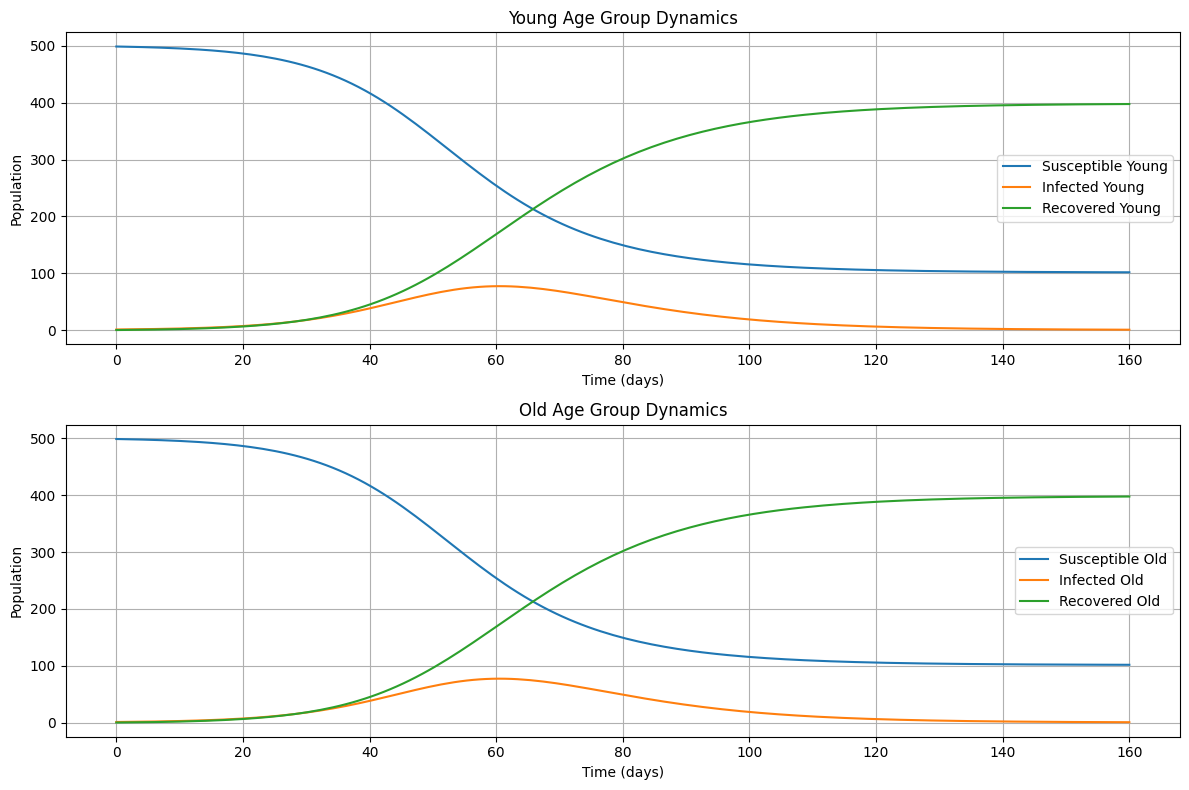

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population
N = 1000
# Initial conditions
I_y0, I_o0 = 1, 1  # Initial number of infected in each age group
R_y0, R_o0 = 0, 0  # Initial recovered individuals
S_y0 = N/2 - I_y0  # Young susceptible population
S_o0 = N/2 - I_o0  # Old susceptible population

# Contact rates
beta_y = 0.3  # Transmission rate for young
beta_o = 0.1  # Transmission rate for old
gamma_y = 1. / 10  # Recovery rate for young
gamma_o = 1. / 10  # Recovery rate for old

# SNE factor
SNE = 1

# Time points for simulation
t = np.linspace(0, 160, 160)

# The age-structured model differential equations
def deriv(y, t, N, beta_y, beta_o, gamma_y, gamma_o, SNE):
    S_y, I_y, R_y, S_o, I_o, R_o = y

    # Differential equations
    dS_y_dt = -beta_y * S_y * I_y / N * SNE - beta_o * S_y * I_o / N * SNE  # Contact with both age groups
    dI_y_dt = beta_y * S_y * I_y / N * SNE + beta_o * S_y * I_o / N * SNE - gamma_y * I_y
    dR_y_dt = gamma_y * I_y

    dS_o_dt = -beta_y * S_o * I_y / N * SNE - beta_o * S_o * I_o / N * SNE  # Contact with both age groups
    dI_o_dt = beta_y * S_o * I_y / N * SNE + beta_o * S_o * I_o / N * SNE - gamma_o * I_o
    dR_o_dt = gamma_o * I_o

    return [dS_y_dt, dI_y_dt, dR_y_dt, dS_o_dt, dI_o_dt, dR_o_dt]

# Initial conditions vector
y0 = [S_y0, I_y0, R_y0, S_o0, I_o0, R_o0]

# Solve the ODE system
solution = odeint(deriv, y0, t, args=(N, beta_y, beta_o, gamma_y, gamma_o, SNE))

# Extract the results
S_y, I_y, R_y, S_o, I_o, R_o = solution.T

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, S_y, label='Susceptible Young')
plt.plot(t, I_y, label='Infected Young')
plt.plot(t, R_y, label='Recovered Young')
plt.title('Young Age Group Dynamics')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, S_o, label='Susceptible Old')
plt.plot(t, I_o, label='Infected Old')
plt.plot(t, R_o, label='Recovered Old')
plt.title('Old Age Group Dynamics')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


effect of change in SNE

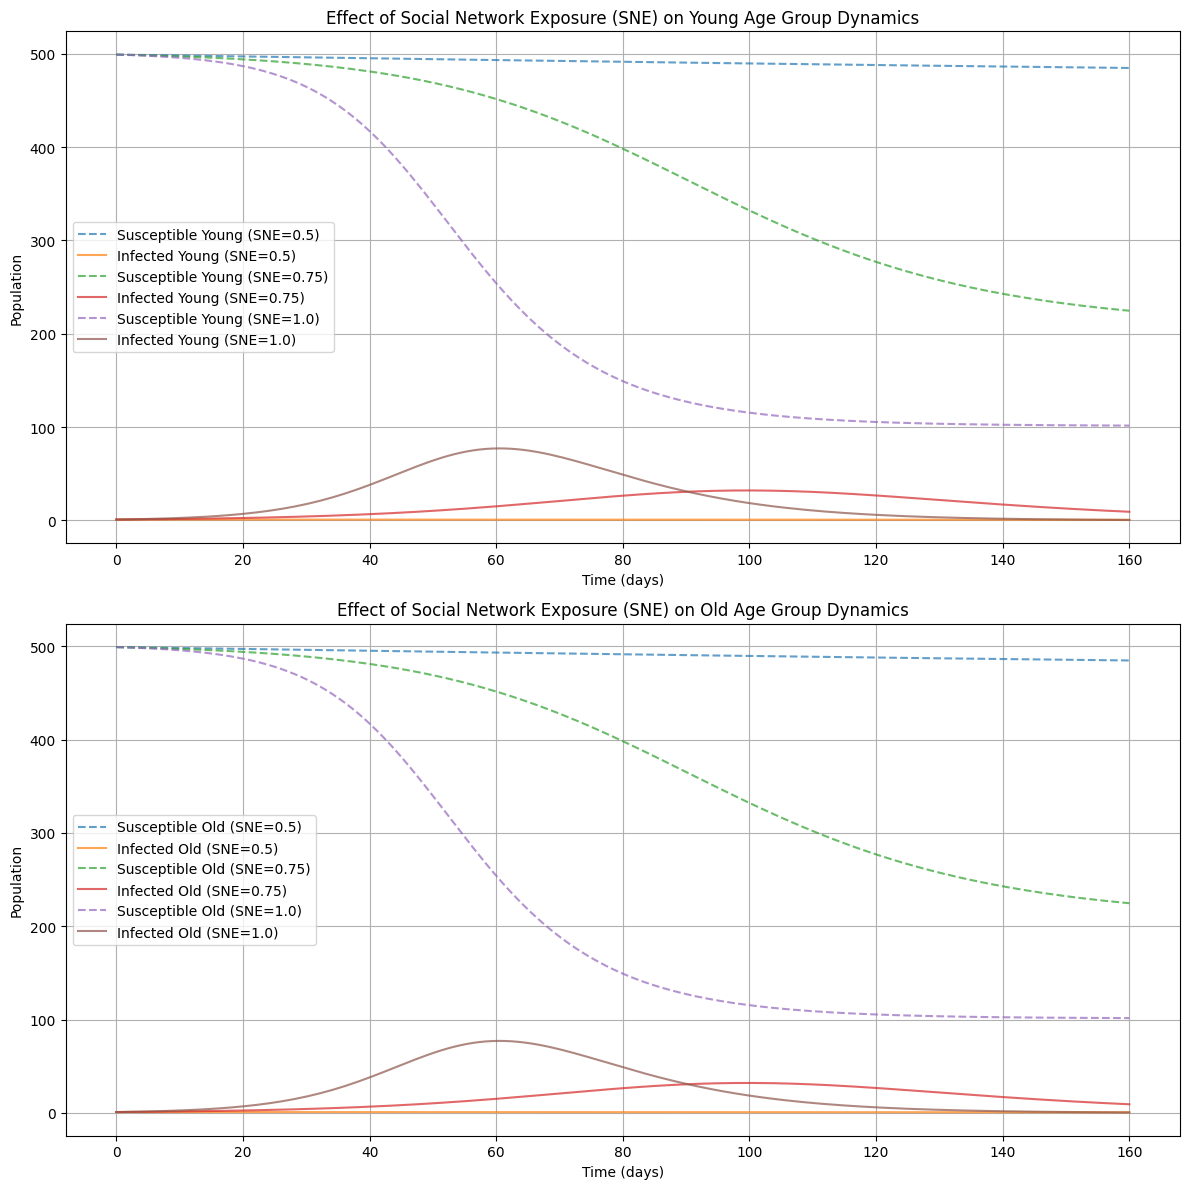

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population
N = 1000
# Initial conditions
I_y0, I_o0 = 1, 1  # Initial number of infected in each age group
R_y0, R_o0 = 0, 0  # Initial recovered individuals
S_y0 = N / 2 - I_y0  # Young susceptible population
S_o0 = N / 2 - I_o0  # Old susceptible population

# Contact rates
beta_y = 0.3  # Transmission rate for young
beta_o = 0.1  # Transmission rate for old
gamma_y = 1. / 10  # Recovery rate for young
gamma_o = 1. / 10  # Recovery rate for old

# Time points for simulation
t = np.linspace(0, 160, 160)

# The age-structured model differential equations
def deriv(y, t, N, beta_y, beta_o, gamma_y, gamma_o, SNE):
    S_y, I_y, R_y, S_o, I_o, R_o = y

    # Differential equations
    dS_y_dt = -beta_y * S_y * I_y / N * SNE - beta_o * S_y * I_o / N * SNE  # Contact with both age groups
    dI_y_dt = beta_y * S_y * I_y / N * SNE + beta_o * S_y * I_o / N * SNE - gamma_y * I_y
    dR_y_dt = gamma_y * I_y

    dS_o_dt = -beta_y * S_o * I_y / N * SNE - beta_o * S_o * I_o / N * SNE  # Contact with both age groups
    dI_o_dt = beta_y * S_o * I_y / N * SNE + beta_o * S_o * I_o / N * SNE - gamma_o * I_o
    dR_o_dt = gamma_o * I_o

    return [dS_y_dt, dI_y_dt, dR_y_dt, dS_o_dt, dI_o_dt, dR_o_dt]

# List of SNE values to test
SNE_values = [0.5, 0.75, 1.0]

# Set up the plot
plt.figure(figsize=(12, 12))

# Loop through each SNE value and run the simulation
for SNE in SNE_values:
    # Initial conditions vector
    y0 = [S_y0, I_y0, R_y0, S_o0, I_o0, R_o0]

    # Solve the ODE system
    solution = odeint(deriv, y0, t, args=(N, beta_y, beta_o, gamma_y, gamma_o, SNE))

    # Extract the results
    S_y, I_y, R_y, S_o, I_o, R_o = solution.T

    # Plot results for Young Age Group
    plt.subplot(2, 1, 1)
    plt.plot(t, S_y, label=f'Susceptible Young (SNE={SNE})', linestyle='--', alpha=0.7)
    plt.plot(t, I_y, label=f'Infected Young (SNE={SNE})', alpha=0.7)

    # Plot results for Old Age Group
    plt.subplot(2, 1, 2)
    plt.plot(t, S_o, label=f'Susceptible Old (SNE={SNE})', linestyle='--', alpha=0.7)
    plt.plot(t, I_o, label=f'Infected Old (SNE={SNE})', alpha=0.7)

# Configure the Young Age Group plot
plt.subplot(2, 1, 1)
plt.title('Effect of Social Network Exposure (SNE) on Young Age Group Dynamics')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()

# Configure the Old Age Group plot
plt.subplot(2, 1, 2)
plt.title('Effect of Social Network Exposure (SNE) on Old Age Group Dynamics')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
